<h1>기하학적 변환</h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC5/blob/main/gg-08-기하학적_변환.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC5/blob/main/gg-08-기하학적_변환.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

시작전에 sdk.png를 코랩 환경의 '/content/sample_data'에 업로드해준다.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   131  100   131    0     0    651      0 --:--:-- --:--:-- --:--:--   651
100 70654  100 70654    0     0   129k      0 --:--:-- --:--:-- --:--:--  543k


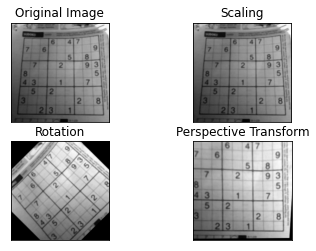

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
# 이미지 읽기
!curl -L https://github.com/swkim01/DSAC5/raw/main/data/sdk.png -o sdk.png
img = cv.imread('./sdk.png',0)
#img = cv.imread('/content/sample_data/sdk.png',0)
img = cv.medianBlur(img,5)
h,w = img.shape

# Scaling
scaimg = cv.resize(img, None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

# Rotation
M = cv.getRotationMatrix2D((w/2,h/2),45,1)
rotimg = cv.warpAffine(img,M,(w,h))

# Perspective Transform
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
ptimg = cv.warpPerspective(img,M,(300,300))

titles = ['Original Image', 'Scaling',
            'Rotation', 'Perspective Transform']
images = [img, scaimg, rotimg, ptimg]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()